# Analyzing euro-dollar exchange rates under different US presidents
### Data Storytelling Exercise

The goal of this project is to use data about exchange rates between the euro and the dollar through time to develop interesting pieces of data visualization that communicate clearly and elegantly relevant information about how these exchange rates varied during the mandates of US presidents Bush, Obama and Trump. 

This is a guided project from the Data Scientist in Python path from Dataquest. The dataset was put together by Daria Chemkaeva using data from the European Central Bank. 

It can be downloaded from https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020

### Extracting the data

In [1]:
# importing relevant libraries 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import datetime as dt

Let's start by reading the data from a file into a dataframe and having a quick look at it.

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
Period\Unit:                5699 non-null object
[Australian dollar ]        5699 non-null object
[Bulgarian lev ]            5297 non-null object
[Brazilian real ]           5431 non-null object
[Canadian dollar ]          5699 non-null object
[Swiss franc ]              5699 non-null object
[Chinese yuan renminbi ]    5431 non-null object
[Cypriot pound ]            2346 non-null object
[Czech koruna ]             5699 non-null object
[Danish krone ]             5699 non-null object
[Estonian kroon ]           3130 non-null object
[UK pound sterling ]        5699 non-null object
[Greek drachma ]            520 non-null object
[Hong Kong dollar ]         5699 non-null object
[Croatian kuna ]            5431 non-null object
[Hungarian forint ]         5699 non-null object
[Indonesian rupiah ]        5699 non-null object
[Israeli shekel ]           5431 non-null object
[Indian rupe

In [5]:
exchange_rates.shape

(5699, 41)

### Data cleaning

In [6]:
# let's start by changing some column names to something easier to handle.

exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)

In [7]:
exchange_rates.reset_index(drop=True, inplace=True)

In [8]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


Now let's isolate just the 'Time' and 'US_dollar' columns, since we don't care about the other currencies

In [9]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

In [10]:
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [11]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
1.0688     1
1.5833     1
1.3424     1
1.2632     1
1.3858     1
Name: US_dollar, Length: 3528, dtype: int64

We see that many rows have a '-' instead of a real value. Weird. Let's get rid of them!

In [12]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

Now let's reset the index again.

In [13]:
euro_to_dollar.reset_index(drop=True, inplace=True)

In [14]:
euro_to_dollar.tail()

,Time,US_dollar
5632,2021-01-04,1.2296
5633,2021-01-05,1.2271
5634,2021-01-06,1.2338
5635,2021-01-07,1.2276
5636,2021-01-08,1.2250


In [15]:
euro_to_dollar.shape

(5637, 2)

In [16]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float')

In [17]:
euro_to_dollar.head(10)

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
5,1999-01-11,1.1569
6,1999-01-12,1.1520
7,1999-01-13,1.1744
8,1999-01-14,1.1653
9,1999-01-15,1.1626


In [18]:
sum(pd.isnull(euro_to_dollar['US_dollar']))

0

We have no null values, which means the conversion to float worked well!

C:\Users\Secondbest\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


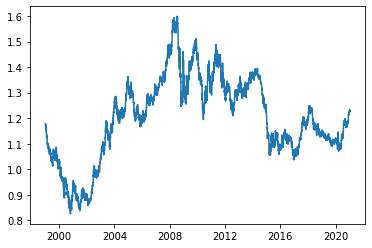

In [19]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

There is a lot of daily variation, which makes the graph a bit ugly and not so clear. Let's use the rolling average of 30 days instead, which will allow us to focus on the main trends.

In [20]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

In [21]:
euro_to_dollar.head(60)

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
5,1999-01-11,1.1569,NaN
6,1999-01-12,1.1520,NaN
7,1999-01-13,1.1744,NaN
8,1999-01-14,1.1653,NaN
9,1999-01-15,1.1626,NaN


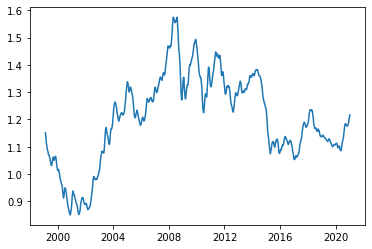

In [22]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

Our plot looks definitely better now!

Let's analyze how the euro-dollar rate changed under the last 3 US presidents.

BUSH - (2001-2009) OBAMA - (2009-2017) TRUMP - (2017-2021)

Before we start working on the plots, let's divide the dataframe into 3 - one for each president's term. We'll use the inauguration day of January 20th as the beginning of each president's dataframe.

In [23]:
bush = euro_to_dollar[(euro_to_dollar['Time'] > dt.datetime(2001, 1, 19)) & (euro_to_dollar['Time'] < dt.datetime(2009, 1, 20))]

In [24]:
obama = euro_to_dollar[(euro_to_dollar['Time'] > dt.datetime(2009, 1, 19)) & (euro_to_dollar['Time'] < dt.datetime(2017, 1, 20))]

In [25]:
trump = euro_to_dollar[(euro_to_dollar['Time'] > dt.datetime(2017, 1, 19)) & (euro_to_dollar['Time'] < dt.datetime(2021, 1, 20))]

Let's join the 3 dataframes to calculate the average exchange rate under the whole period.

In [26]:
three_presidents = pd.concat([bush, obama, trump])

In [27]:
three_presidents['US_dollar'].mean()

1.2209698571148995

In [28]:
three_presidents['rolling_mean'] = three_presidents['US_dollar'].rolling(30).mean()

Let's start with the 'skeleton' of the 3 plots

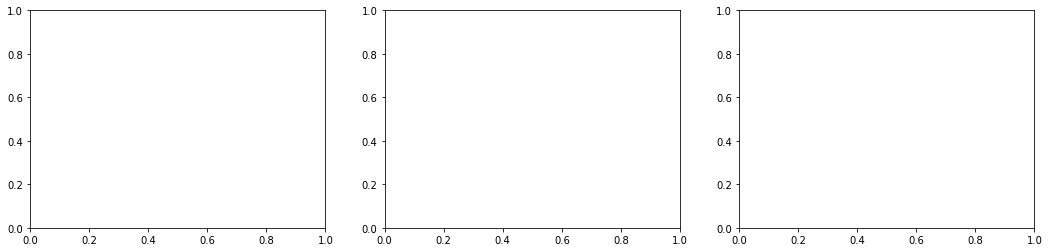

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))

Size looks alright! Let's start adding layers to it.

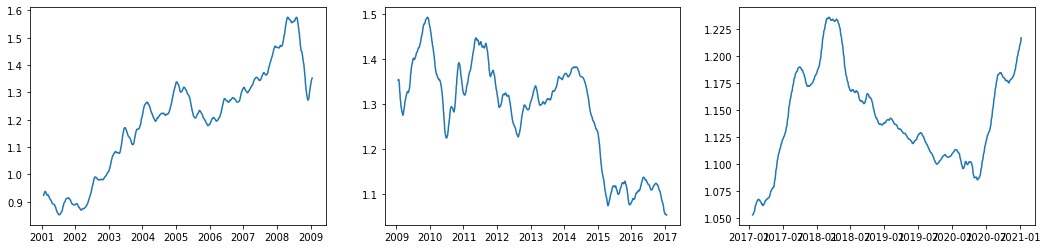

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
ax1.plot(bush['Time'],
         bush['rolling_mean'])
ax2.plot(obama['Time'],
         obama['rolling_mean'])
ax3.plot(trump['Time'],
         trump['rolling_mean'])
plt.show()


We can see that the y-axis has different values for each plot, which makes comparisons difficult. Let's fix that by making sure the 3 plots' y-axes have the same range.

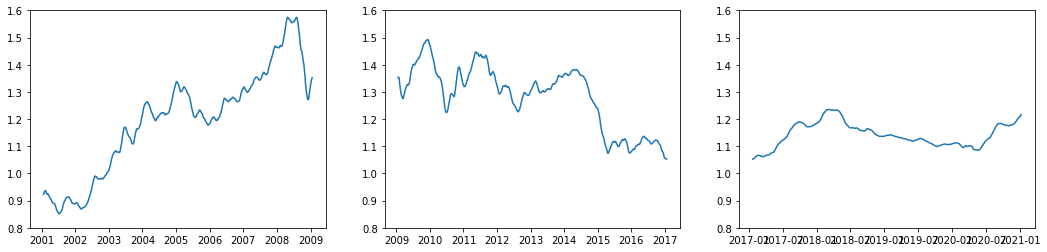

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
ax1.plot(bush['Time'],
         bush['rolling_mean'])
ax1.set_ylim(0.8, 1.6)
ax2.plot(obama['Time'],
         obama['rolling_mean'])
ax2.set_ylim(0.8, 1.6)
ax3.plot(trump['Time'],
         trump['rolling_mean'])
ax3.set_ylim(0.8, 1.6)
plt.show()

Big difference! Now let's take make it look nicer.

How about we try the style of the website FiveThirtyEight?

In [32]:
style.use('fivethirtyeight')

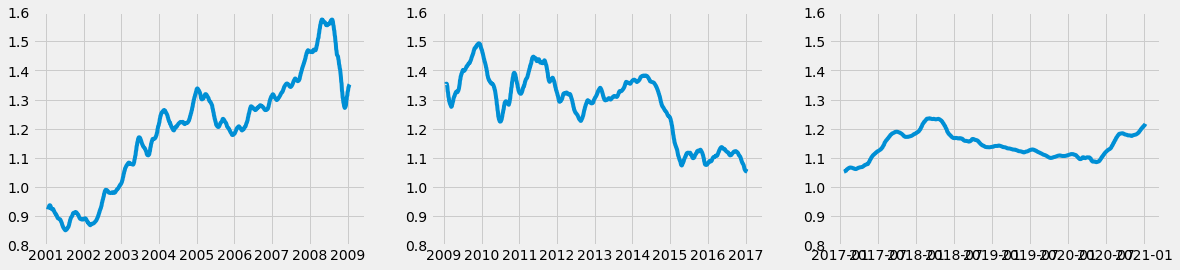

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
ax1.plot(bush['Time'],
         bush['rolling_mean'])
ax1.set_ylim(0.8, 1.6)
ax2.plot(obama['Time'],
         obama['rolling_mean'])
ax2.set_ylim(0.8, 1.6)
ax3.plot(trump['Time'],
         trump['rolling_mean'])
ax3.set_ylim(0.8, 1.6)
plt.show()

Looks way better now! Let's do some work with the x and y ticks.

The x-tick labels of the third plot look horrible! We need to clean them up. Let's plot it separately to give a closer look. Rotating the x-axis labels can help us read them better.

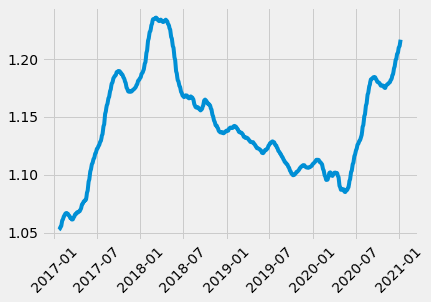

In [34]:
plt.plot(trump['Time'],
         trump['rolling_mean'])
plt.xticks(rotation=45)
plt.show()

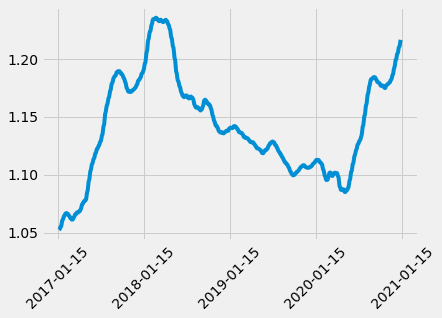

In [35]:
plt.plot(trump['Time'],
         trump['rolling_mean'])
plt.xticks([dt.datetime(2017, 1, 15),
            dt.datetime(2018, 1, 15),
            dt.datetime(2019, 1, 15),
            dt.datetime(2020, 1, 15),
            dt.datetime(2021, 1, 15)])
plt.xticks(rotation=45)
plt.show()

That's more like it! We can go back to working on the 3-plot ensemble now. Next thing we'll do is remove some of the x and y labels - there are too many of them and things get confusing. Let's also adjust the change the color of the axes and their ticks, so that the lines with the exchange rates evolution stands out. We can also play around a bit with the sizes of the axes to make sure the data we want to present is shown in an adequate way. 

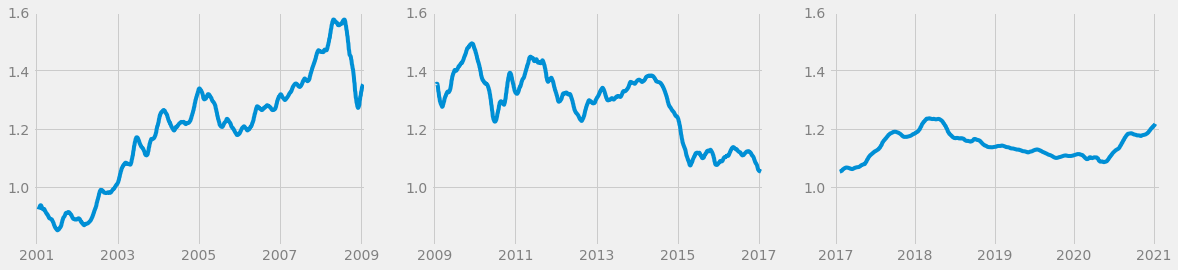

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
ax1.plot(bush['Time'],
         bush['rolling_mean'])
ax1.set_ylim(0.8, 1.6)
ax1.set_yticks([1.0, 1.2, 1.4, 1.6])
ax1.set_xlim(dt.datetime(2000, 12, 1), dt.datetime(2009, 2, 1))
ax1.set_xticks([dt.datetime(2001, 1, 1),
                dt.datetime(2003, 1, 1),
                dt.datetime(2005, 1, 1),
                dt.datetime(2007, 1, 1),
                dt.datetime(2009, 1, 1)])
ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')
ax2.plot(obama['Time'],
         obama['rolling_mean'])
ax2.set_ylim(0.8, 1.6)
ax2.set_yticks([1.0, 1.2, 1.4, 1.6])
ax2.set_xlim(dt.datetime(2008, 12, 1), dt.datetime(2017, 2, 1))
ax2.set_xticks([dt.datetime(2009, 1, 1),
                dt.datetime(2011, 1, 1),
                dt.datetime(2013, 1, 1),
                dt.datetime(2015, 1, 1),
                dt.datetime(2017, 1, 1)])
ax2.tick_params(axis='x', colors='grey')
ax2.tick_params(axis='y', colors='grey')
ax3.plot(trump['Time'],
         trump['rolling_mean'])
ax3.set_ylim(0.8, 1.6)
ax3.set_yticks([1.0, 1.2, 1.4, 1.6])
ax3.set_xlim(dt.datetime(2016, 12, 1), dt.datetime(2021,2,1))
ax3.set_xticks([dt.datetime(2017, 1, 1),
                dt.datetime(2018, 1, 1),
                dt.datetime(2019, 1, 1),
                dt.datetime(2020, 1, 1),
                dt.datetime(2021, 1, 1)])
ax3.tick_params(axis='x', colors='grey')
ax3.tick_params(axis='y', colors='grey')

ax1.set_xticklabels([2001, 2003, 2005, 2007, 2009])
ax2.set_xticklabels([2009, 2011, 2013, 2015, 2017])
ax3.set_xticklabels([2017, 2018, 2019, 2020, 2021])


plt.show()

Now let's change the colors of the different plots to differentiate them more clearly. 

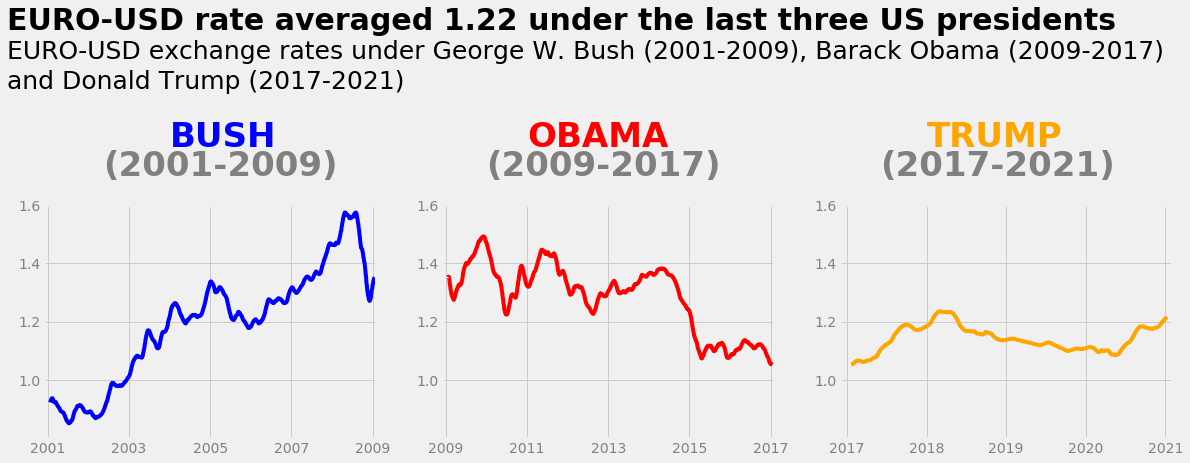

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))

#first plot - bush

ax1.plot(bush['Time'],
         bush['rolling_mean'],
         color='blue')
ax1.set_ylim(0.8, 1.6)
ax1.set_yticks([1.0, 1.2, 1.4, 1.6])
ax1.set_xlim(dt.datetime(2000, 12, 1), dt.datetime(2009, 2, 1))
ax1.set_xticks([dt.datetime(2001, 1, 1),
                dt.datetime(2003, 1, 1),
                dt.datetime(2005, 1, 1),
                dt.datetime(2007, 1, 1),
                dt.datetime(2009, 1, 1)])
ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')

#second plot - obama

ax2.plot(obama['Time'],
         obama['rolling_mean'],
         color='red')
ax2.set_ylim(0.8, 1.6)
ax2.set_yticks([1.0, 1.2, 1.4, 1.6])
ax2.set_xlim(dt.datetime(2008, 12, 1), dt.datetime(2017, 2, 1))
ax2.set_xticks([dt.datetime(2009, 1, 1),
                dt.datetime(2011, 1, 1),
                dt.datetime(2013, 1, 1),
                dt.datetime(2015, 1, 1),
                dt.datetime(2017, 1, 1)])
ax2.tick_params(axis='x', colors='grey')
ax2.tick_params(axis='y', colors='grey')

#third plot - trump

ax3.plot(trump['Time'],
         trump['rolling_mean'],
         color='orange')
ax3.set_ylim(0.8, 1.6)
ax3.set_yticks([1.0, 1.2, 1.4, 1.6])
ax3.set_xlim(dt.datetime(2016, 12, 1), dt.datetime(2021,2,1))
ax3.set_xticks([dt.datetime(2017, 1, 1),
                dt.datetime(2018, 1, 1),
                dt.datetime(2019, 1, 1),
                dt.datetime(2020, 1, 1),
                dt.datetime(2021, 1, 1)])
ax3.tick_params(axis='x', colors='grey')
ax3.tick_params(axis='y', colors='grey')

# now let's add some text
ax1.text(dt.datetime(2004, 1, 1), 1.8, 'BUSH', 
         fontsize=34, weight='bold', color='blue')
ax1.text(dt.datetime(2002, 5, 15), 1.7, '(2001-2009)', 
         fontsize=34, weight='bold', color='grey')

ax2.text(dt.datetime(2011, 1, 1), 1.8, 'OBAMA', 
         fontsize=34, weight='bold', color='red')
ax2.text(dt.datetime(2010, 1, 1), 1.7, '(2009-2017)', 
        fontsize=34, weight='bold', color='grey')


ax3.text(dt.datetime(2018, 1, 1), 1.8, 'TRUMP', 
         fontsize=34, weight='bold', color='orange')
ax3.text(dt.datetime(2017, 6, 1), 1.7, '(2017-2021)', 
        fontsize=34, weight='bold', color='grey')

# title

ax1.text(dt.datetime(2000, 1, 1), 2.2, 'EURO-USD rate averaged 1.22 under the last three US presidents', 
         fontsize=30, weight='bold')
ax1.text(dt.datetime(2000, 1, 1), 2.1,
         'EURO-USD exchange rates under George W. Bush (2001-2009), Barack Obama (2009-2017)',
         fontsize=25)
ax1.text(dt.datetime(2000, 1, 1), 2.0,
         'and Donald Trump (2017-2021)', 
         fontsize=25)

ax1.set_xticklabels([2001, 2003, 2005, 2007, 2009])
ax2.set_xticklabels([2009, 2011, 2013, 2015, 2017])
ax3.set_xticklabels([2017, 2018, 2019, 2020, 2021])
    


# end
plt.show()

Beautiful! Let's try adding some important events to the plots, like 9/11.

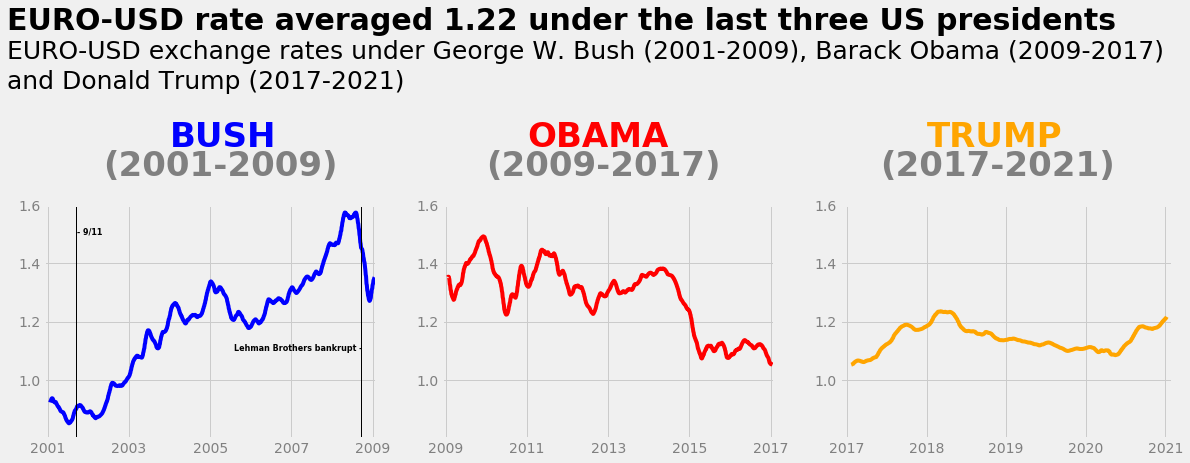

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))

#first plot - bush

ax1.plot(bush['Time'],
         bush['rolling_mean'],
         color='blue')
ax1.set_ylim(0.8, 1.6)
ax1.set_yticks([1.0, 1.2, 1.4, 1.6])
ax1.set_xlim(dt.datetime(2000, 12, 1), dt.datetime(2009, 2, 1))
ax1.set_xticks([dt.datetime(2001, 1, 1),
                dt.datetime(2003, 1, 1),
                dt.datetime(2005, 1, 1),
                dt.datetime(2007, 1, 1),
                dt.datetime(2009, 1, 1)])
ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')

ax1.axvline(dt.datetime(2001, 9, 11), color='black',
            linewidth=1)
ax1.text(dt.datetime(2001, 9, 20), 1.5,
         '- 9/11', weight='bold', fontsize=8)

ax1.axvline(dt.datetime(2008, 9, 15), color='black',
            linewidth=1)
ax1.text(dt.datetime(2005, 8, 1), 1.1,
         'Lehman Brothers bankrupt - ', weight='bold', fontsize=8)


#second plot - obama

ax2.plot(obama['Time'],
         obama['rolling_mean'],
         color='red')
ax2.set_ylim(0.8, 1.6)
ax2.set_yticks([1.0, 1.2, 1.4, 1.6])
ax2.set_xlim(dt.datetime(2008, 12, 1), dt.datetime(2017, 2, 1))
ax2.set_xticks([dt.datetime(2009, 1, 1),
                dt.datetime(2011, 1, 1),
                dt.datetime(2013, 1, 1),
                dt.datetime(2015, 1, 1),
                dt.datetime(2017, 1, 1)])
ax2.tick_params(axis='x', colors='grey')
ax2.tick_params(axis='y', colors='grey')

#third plot - trump

ax3.plot(trump['Time'],
         trump['rolling_mean'],
         color='orange')
ax3.set_ylim(0.8, 1.6)
ax3.set_yticks([1.0, 1.2, 1.4, 1.6])
ax3.set_xlim(dt.datetime(2016, 12, 1), dt.datetime(2021,2,1))
ax3.set_xticks([dt.datetime(2017, 1, 1),
                dt.datetime(2018, 1, 1),
                dt.datetime(2019, 1, 1),
                dt.datetime(2020, 1, 1),
                dt.datetime(2021, 1, 1)])
ax3.tick_params(axis='x', colors='grey')
ax3.tick_params(axis='y', colors='grey')

# now let's add some text
ax1.text(dt.datetime(2004, 1, 1), 1.8, 'BUSH', 
         fontsize=34, weight='bold', color='blue')
ax1.text(dt.datetime(2002, 5, 15), 1.7, '(2001-2009)', 
         fontsize=34, weight='bold', color='grey')

ax2.text(dt.datetime(2011, 1, 1), 1.8, 'OBAMA', 
         fontsize=34, weight='bold', color='red')
ax2.text(dt.datetime(2010, 1, 1), 1.7, '(2009-2017)', 
        fontsize=34, weight='bold', color='grey')


ax3.text(dt.datetime(2018, 1, 1), 1.8, 'TRUMP', 
         fontsize=34, weight='bold', color='orange')
ax3.text(dt.datetime(2017, 6, 1), 1.7, '(2017-2021)', 
        fontsize=34, weight='bold', color='grey')

# title

ax1.text(dt.datetime(2000, 1, 1), 2.2, 'EURO-USD rate averaged 1.22 under the last three US presidents', 
         fontsize=30, weight='bold')
ax1.text(dt.datetime(2000, 1, 1), 2.1,
         'EURO-USD exchange rates under George W. Bush (2001-2009), Barack Obama (2009-2017)',
         fontsize=25)
ax1.text(dt.datetime(2000, 1, 1), 2.0,
         'and Donald Trump (2017-2021)', 
         fontsize=25)
  
ax1.set_xticklabels([2001, 2003, 2005, 2007, 2009])
ax2.set_xticklabels([2009, 2011, 2013, 2015, 2017])
ax3.set_xticklabels([2017, 2018, 2019, 2020, 2021])



# end
plt.show()

That looks interesting, although if we keep adding more events the plots can become overcrowded and the information we want to convey might become mixed up with other data and our message won't be so clear. So let's remove the events and just add a horizontal line with the average for the period.

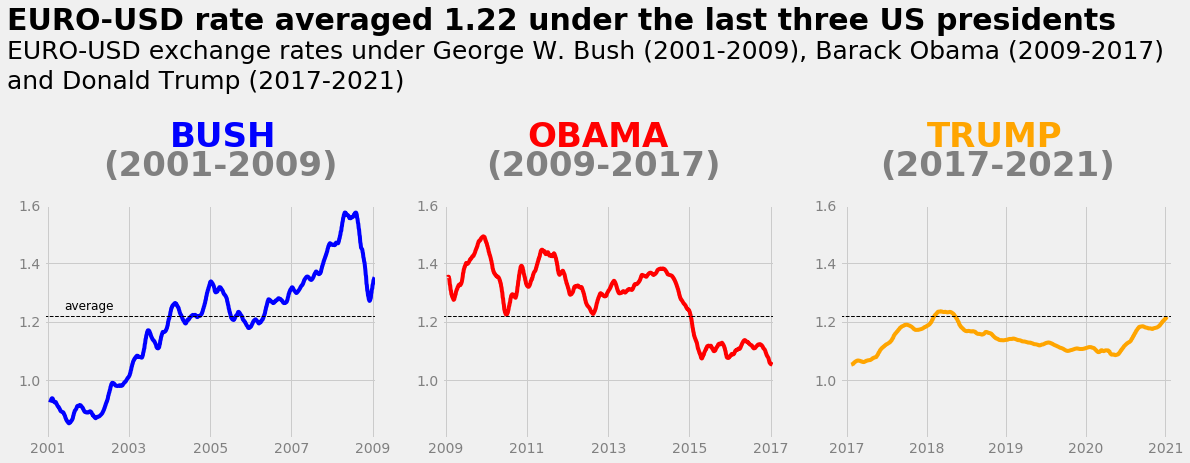

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))

#first plot - bush

ax1.plot(bush['Time'],
         bush['rolling_mean'],
         color='blue')
ax1.set_ylim(0.8, 1.6)
ax1.set_yticks([1.0, 1.2, 1.4, 1.6])
ax1.set_xlim(dt.datetime(2000, 12, 1), dt.datetime(2009, 2, 1))
ax1.set_xticks([dt.datetime(2001, 1, 1),
                dt.datetime(2003, 1, 1),
                dt.datetime(2005, 1, 1),
                dt.datetime(2007, 1, 1),
                dt.datetime(2009, 1, 1)])
ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')

ax1.axhline(three_presidents['US_dollar'].mean(), 
            color='black', linewidth=1, linestyle='--')


#second plot - obama

ax2.plot(obama['Time'],
         obama['rolling_mean'],
         color='red')
ax2.set_ylim(0.8, 1.6)
ax2.set_yticks([1.0, 1.2, 1.4, 1.6])
ax2.set_xlim(dt.datetime(2008, 12, 1), dt.datetime(2017, 2, 1))
ax2.set_xticks([dt.datetime(2009, 1, 1),
                dt.datetime(2011, 1, 1),
                dt.datetime(2013, 1, 1),
                dt.datetime(2015, 1, 1),
                dt.datetime(2017, 1, 1)])
ax2.tick_params(axis='x', colors='grey')
ax2.tick_params(axis='y', colors='grey')

ax2.axhline(three_presidents['US_dollar'].mean(), 
            color='black', linewidth=1, linestyle='--')



#third plot - trump

ax3.plot(trump['Time'],
         trump['rolling_mean'],
         color='orange')
ax3.set_ylim(0.8, 1.6)
ax3.set_yticks([1.0, 1.2, 1.4, 1.6])
ax3.set_xlim(dt.datetime(2016, 12, 1), dt.datetime(2021,2,1))
ax3.set_xticks([dt.datetime(2017, 1, 1),
                dt.datetime(2018, 1, 1),
                dt.datetime(2019, 1, 1),
                dt.datetime(2020, 1, 1),
                dt.datetime(2021, 1, 1)])
ax3.tick_params(axis='x', colors='grey')
ax3.tick_params(axis='y', colors='grey')

ax3.axhline(three_presidents['US_dollar'].mean(), 
            color='black', linewidth=1, linestyle='--')


# now let's add some text
ax1.text(dt.datetime(2004, 1, 1), 1.8, 'BUSH', 
         fontsize=34, weight='bold', color='blue')
ax1.text(dt.datetime(2002, 5, 15), 1.7, '(2001-2009)', 
         fontsize=34, weight='bold', color='grey')

ax2.text(dt.datetime(2011, 1, 1), 1.8, 'OBAMA', 
         fontsize=34, weight='bold', color='red')
ax2.text(dt.datetime(2010, 1, 1), 1.7, '(2009-2017)', 
        fontsize=34, weight='bold', color='grey')


ax3.text(dt.datetime(2018, 1, 1), 1.8, 'TRUMP', 
         fontsize=34, weight='bold', color='orange')
ax3.text(dt.datetime(2017, 6, 1), 1.7, '(2017-2021)', 
        fontsize=34, weight='bold', color='grey')

# text for the average line

ax1.text(dt.datetime(2001, 6, 1), 1.24,
         'average', fontsize=12)

# title

ax1.text(dt.datetime(2000, 1, 1), 2.2, 'EURO-USD rate averaged 1.22 under the last three US presidents', 
         fontsize=30, weight='bold')
ax1.text(dt.datetime(2000, 1, 1), 2.1,
         'EURO-USD exchange rates under George W. Bush (2001-2009), Barack Obama (2009-2017)',
         fontsize=25)
ax1.text(dt.datetime(2000, 1, 1), 2.0,
         'and Donald Trump (2017-2021)', 
         fontsize=25)       

ax1.set_xticklabels([2001, 2003, 2005, 2007, 2009])
ax2.set_xticklabels([2009, 2011, 2013, 2015, 2017])
ax3.set_xticklabels([2017, 2018, 2019, 2020, 2021])



# end
plt.show()

### Quick digression - dealing with '-' values in a different way

Instead of removing them like we did with the euros-dollars exchange rates dataframe, we could deal with the '-' values in a different way. How about we replace them by the mean of the values that come before and after them. That way we create a 'smooth' series without holes.

In [40]:
exchange_rates.rename(columns={'[Australian dollar ]': 'Australian_dollar'}, inplace=True)


In [41]:
# let's make a safety copy of the column before we make any changes

aussie_dollar = exchange_rates['Australian_dollar'].copy()

for i in range(0, len(exchange_rates)):
    if exchange_rates['Australian_dollar'][i] != '-':
        continue
    else:
        if exchange_rates['Australian_dollar'][i-1] != '-':
            previous_value = exchange_rates['Australian_dollar'][i-1]
        j = i
        while exchange_rates['Australian_dollar'][j+1] == '-':
            j += 1
        next_value = exchange_rates['Australian_dollar'][j+1]
        exchange_rates.loc[i, 'Australian_dollar'] = (float(previous_value) +
                                                  float(next_value)) / 2

In [42]:
exchange_rates['Australian_dollar'] = exchange_rates['Australian_dollar'].astype('float')

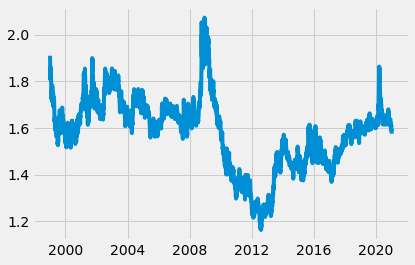

In [43]:
plt.plot(exchange_rates['Time'], exchange_rates['Australian_dollar'])

### End digression

Now let's go back to our plots and add a shaded area to highlight the period of the Great Recession of 2007-2009 to it. 

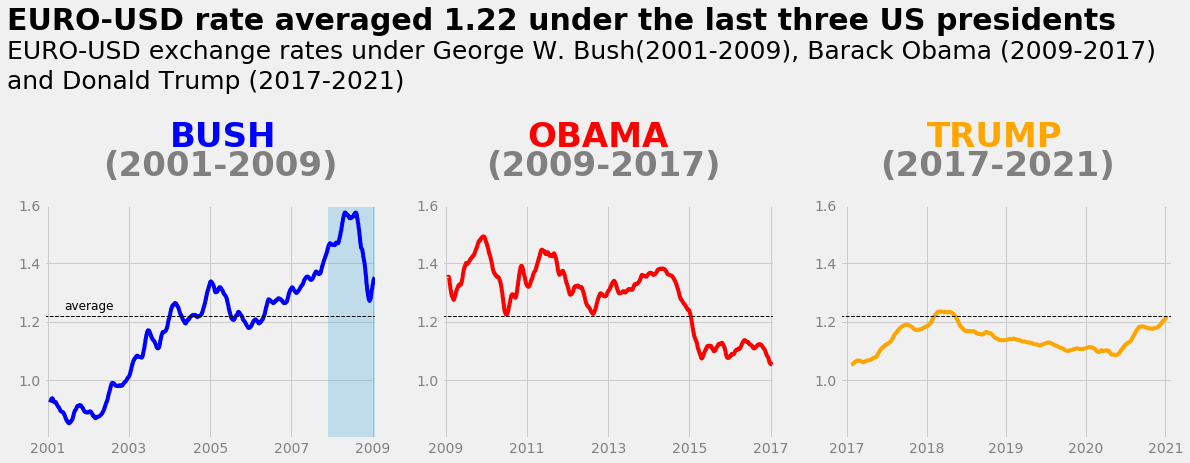

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))

#first plot - bush

ax1.plot(bush['Time'],
         bush['rolling_mean'],
         color='blue')
ax1.set_ylim(0.8, 1.6)
ax1.set_yticks([1.0, 1.2, 1.4, 1.6])
ax1.set_xlim(dt.datetime(2000, 12, 1), dt.datetime(2009, 2, 1))
ax1.set_xticks([dt.datetime(2001, 1, 1),
                dt.datetime(2003, 1, 1),
                dt.datetime(2005, 1, 1),
                dt.datetime(2007, 1, 1),
                dt.datetime(2009, 1, 1)])
ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')

ax1.axhline(three_presidents['US_dollar'].mean(), 
            color='black', linewidth=1, linestyle='--')


#second plot - obama

ax2.plot(obama['Time'],
         obama['rolling_mean'],
         color='red')
ax2.set_ylim(0.8, 1.6)
ax2.set_yticks([1.0, 1.2, 1.4, 1.6])
ax2.set_xlim(dt.datetime(2008, 12, 1), dt.datetime(2017, 2, 1))
ax2.set_xticks([dt.datetime(2009, 1, 1),
                dt.datetime(2011, 1, 1),
                dt.datetime(2013, 1, 1),
                dt.datetime(2015, 1, 1),
                dt.datetime(2017, 1, 1)])
ax2.tick_params(axis='x', colors='grey')
ax2.tick_params(axis='y', colors='grey')

ax2.axhline(three_presidents['US_dollar'].mean(), 
            color='black', linewidth=1, linestyle='--')



#third plot - trump

ax3.plot(trump['Time'],
         trump['rolling_mean'],
         color='orange')
ax3.set_ylim(0.8, 1.6)
ax3.set_yticks([1.0, 1.2, 1.4, 1.6])
ax3.set_xlim(dt.datetime(2016, 12, 1), dt.datetime(2021,2,1))
ax3.set_xticks([dt.datetime(2017, 1, 1),
                dt.datetime(2018, 1, 1),
                dt.datetime(2019, 1, 1),
                dt.datetime(2020, 1, 1),
                dt.datetime(2021, 1, 1)])
ax3.tick_params(axis='x', colors='grey')
ax3.tick_params(axis='y', colors='grey')

ax3.axhline(three_presidents['US_dollar'].mean(), 
            color='black', linewidth=1, linestyle='--')


# now let's add some text
ax1.text(dt.datetime(2004, 1, 1), 1.8, 'BUSH', 
         fontsize=34, weight='bold', color='blue')
ax1.text(dt.datetime(2002, 5, 15), 1.7, '(2001-2009)', 
         fontsize=34, weight='bold', color='grey')

ax2.text(dt.datetime(2011, 1, 1), 1.8, 'OBAMA', 
         fontsize=34, weight='bold', color='red')
ax2.text(dt.datetime(2010, 1, 1), 1.7, '(2009-2017)', 
        fontsize=34, weight='bold', color='grey')


ax3.text(dt.datetime(2018, 1, 1), 1.8, 'TRUMP', 
         fontsize=34, weight='bold', color='orange')
ax3.text(dt.datetime(2017, 6, 1), 1.7, '(2017-2021)', 
        fontsize=34, weight='bold', color='grey')

# text for the average line

ax1.text(dt.datetime(2001, 6, 1), 1.24,
         'average', fontsize=12)

# title

ax1.text(dt.datetime(2000, 1, 1), 2.2, 'EURO-USD rate averaged 1.22 under the last three US presidents', 
         fontsize=30, weight='bold')
ax1.text(dt.datetime(2000, 1, 1), 2.1,
         'EURO-USD exchange rates under George W. Bush(2001-2009), Barack Obama (2009-2017)',
         fontsize=25)
ax1.text(dt.datetime(2000, 1, 1), 2.0,
         'and Donald Trump (2017-2021)', 
         fontsize=25)       

# let's change the background color of the time of the great recession
# to highlight it

ax1.axvspan(dt.datetime(2007, 12, 1), dt.datetime(2009, 6, 1), alpha=0.2)

ax1.set_xticklabels([2001, 2003, 2005, 2007, 2009])
ax2.set_xticklabels([2009, 2011, 2013, 2015, 2017])
ax3.set_xticklabels([2017, 2018, 2019, 2020, 2021])


# end
plt.show()

Now let's add a separate graph under the ones we did with the whole period. We'll highlight the Great Recession only in the general plot, since it started in the Bush presidency and ended during Obama's.

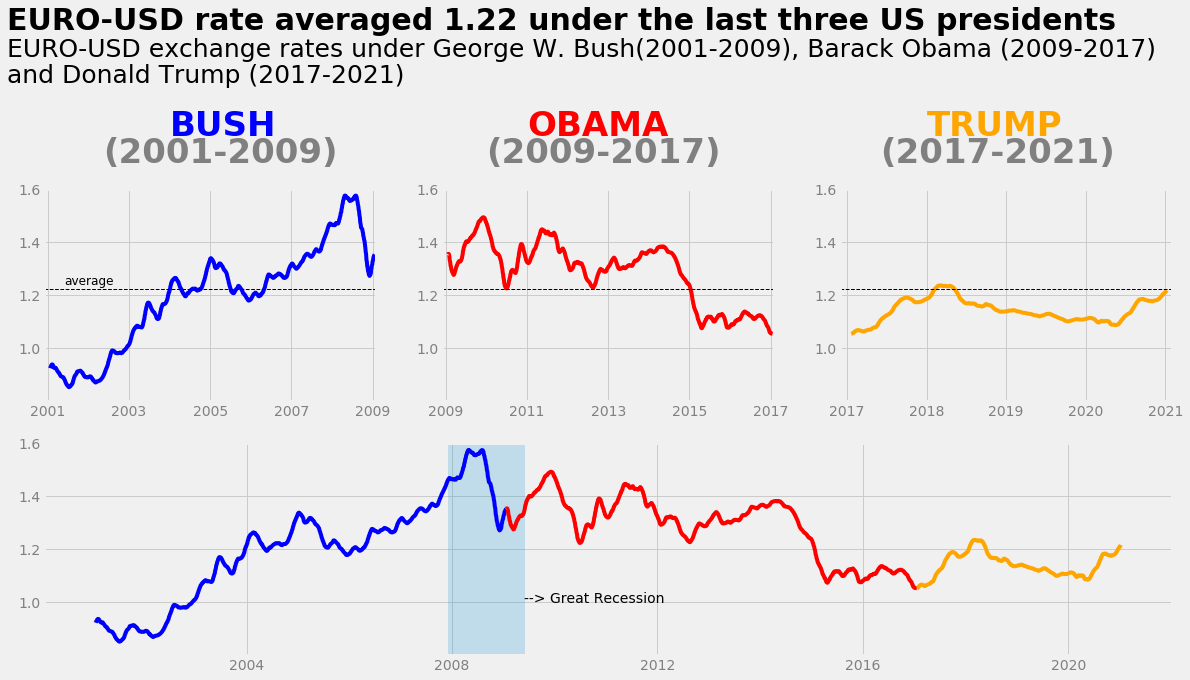

In [45]:
# fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
fig = plt.figure(figsize=(18,8))

#first plot - bush
ax1 = fig.add_subplot(2, 3, 1)
ax1.plot(bush['Time'],
         bush['rolling_mean'],
         color='blue')
ax1.set_ylim(0.8, 1.6)
ax1.set_yticks([1.0, 1.2, 1.4, 1.6])
ax1.set_xlim(dt.datetime(2000, 12, 1), dt.datetime(2009, 2, 1))
ax1.set_xticks([dt.datetime(2001, 1, 1),
                dt.datetime(2003, 1, 1),
                dt.datetime(2005, 1, 1),
                dt.datetime(2007, 1, 1),
                dt.datetime(2009, 1, 1)])

ax1.set_xticklabels([2001, 2003, 2005, 2007, 2009])

ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')

ax1.axhline(three_presidents['US_dollar'].mean(), 
            color='black', linewidth=1, linestyle='--')


#second plot - obama

ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(obama['Time'],
         obama['rolling_mean'],
         color='red')
ax2.set_ylim(0.8, 1.6)
ax2.set_yticks([1.0, 1.2, 1.4, 1.6])
ax2.set_xlim(dt.datetime(2008, 12, 1), dt.datetime(2017, 2, 1))
ax2.set_xticks([dt.datetime(2009, 1, 1),
                dt.datetime(2011, 1, 1),
                dt.datetime(2013, 1, 1),
                dt.datetime(2015, 1, 1),
                dt.datetime(2017, 1, 1)])
ax2.set_xticklabels([2009, 2011, 2013, 2015, 2017])

ax2.tick_params(axis='x', colors='grey')
ax2.tick_params(axis='y', colors='grey')



ax2.axhline(three_presidents['US_dollar'].mean(), 
            color='black', linewidth=1, linestyle='--')



#third plot - trump

ax3 = fig.add_subplot(2, 3, 3)

ax3.plot(trump['Time'],
         trump['rolling_mean'],
         color='orange')
ax3.set_ylim(0.8, 1.6)
ax3.set_yticks([1.0, 1.2, 1.4, 1.6])
ax3.set_xlim(dt.datetime(2016, 12, 1), dt.datetime(2021,2,1))
ax3.set_xticks([dt.datetime(2017, 1, 1),
                dt.datetime(2018, 1, 1),
                dt.datetime(2019, 1, 1),
                dt.datetime(2020, 1, 1),
                dt.datetime(2021, 1, 1)])

ax3.set_xticklabels([2017, 2018, 2019, 2020, 2021])

ax3.tick_params(axis='x', colors='grey')
ax3.tick_params(axis='y', colors='grey')

ax3.axhline(three_presidents['US_dollar'].mean(), 
            color='black', linewidth=1, linestyle='--')


# now let's add some text
ax1.text(dt.datetime(2004, 1, 1), 1.8, 'BUSH', 
         fontsize=34, weight='bold', color='blue')
ax1.text(dt.datetime(2002, 5, 15), 1.7, '(2001-2009)', 
         fontsize=34, weight='bold', color='grey')

ax2.text(dt.datetime(2011, 1, 1), 1.8, 'OBAMA', 
         fontsize=34, weight='bold', color='red')
ax2.text(dt.datetime(2010, 1, 1), 1.7, '(2009-2017)', 
        fontsize=34, weight='bold', color='grey')


ax3.text(dt.datetime(2018, 1, 1), 1.8, 'TRUMP', 
         fontsize=34, weight='bold', color='orange')
ax3.text(dt.datetime(2017, 6, 1), 1.7, '(2017-2021)', 
        fontsize=34, weight='bold', color='grey')

# text for the average line

ax1.text(dt.datetime(2001, 6, 1), 1.24,
         'average', fontsize=12)

# title

ax1.text(dt.datetime(2000, 1, 1), 2.2, 'EURO-USD rate averaged 1.22 under the last three US presidents', 
         fontsize=30, weight='bold')
ax1.text(dt.datetime(2000, 1, 1), 2.1,
         'EURO-USD exchange rates under George W. Bush(2001-2009), Barack Obama (2009-2017)',
         fontsize=25)
ax1.text(dt.datetime(2000, 1, 1), 2.0,
         'and Donald Trump (2017-2021)', 
         fontsize=25)       

# let's add the extra plot

ax4 = fig.add_subplot(2, 1, 2)

ax4.plot(bush['Time'],
         bush['rolling_mean'],
         color='blue')
ax4.plot(obama['Time'],
         obama['rolling_mean'],
         color='red')
ax4.plot(trump['Time'],
         trump['rolling_mean'],
         color='orange')

ax4.set_ylim(0.8, 1.6)
ax4.set_yticks([1.0, 1.2, 1.4, 1.6])
ax4.tick_params(axis='x', colors='grey')
ax4.tick_params(axis='y', colors='grey')






# let's change the background color of the time of the great recession
# to highlight it

ax4.axvspan(dt.datetime(2007, 12, 1), dt.datetime(2009, 6, 1), alpha=0.2)


# adding text for Great Recession

ax4.text(dt.datetime(2009, 5, 25), 1.0,
         '--> Great Recession')



# end
plt.show()



Looks good! In the future, we'll explore more data storytelling possibilities using this dataset. 